In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
data = pd.read_csv("Startups+in+2021+end.csv")

## Visualização e tratamento do bando de dados

In [306]:
display(data)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...,...
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


In [307]:
data = data.drop(["Unnamed: 0"],axis=1)
display(data)
data.shape

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"


(936, 7)

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           936 non-null    object
 1   Valuation ($B)    936 non-null    object
 2   Date Joined       936 non-null    object
 3   Country           936 non-null    object
 4   City              921 non-null    object
 5   Industry          936 non-null    object
 6   Select Investors  935 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


#### **Células nulas**

In [309]:
data.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

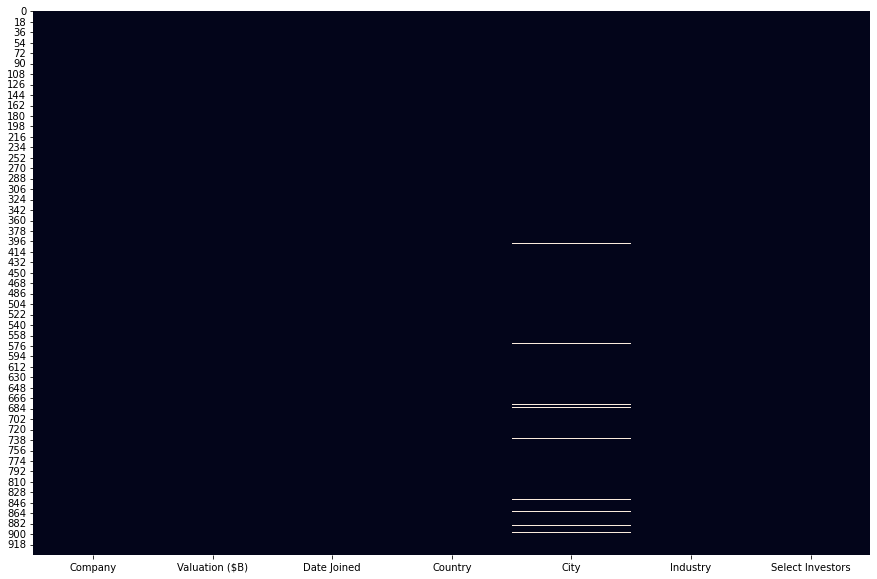

In [310]:
plt.figure(figsize = (15,10))
sns.heatmap(data.isnull(),cbar=False);

In [311]:
#Campos unicos (valores que se repetem em uma coluna)

data.nunique()

Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [312]:
data["Industry"].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [313]:
data["Industry"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

### Industry com nome errado: 'Finttech' em vez de 'Fintech', "Artificial intelligence" em vez de "Artificial Intelligence"

In [314]:
data.loc[data["Industry"] == "Finttech","Industry"] = "Fintech"
data.loc[data["Industry"] == "Artificial intelligence","Industry"] = "Artificial Intelligence"

In [315]:
analise_industry = round(data["Industry"].value_counts(normalize=True)*100,2)
analise_industry

Fintech                                20.41
Internet software & services           17.84
E-commerce & direct-to-consumer        10.90
Artificial Intelligence                 7.80
Health                                  6.73
Other                                   5.45
Supply chain, logistics, & delivery     5.45
Cybersecurity                           4.38
Mobile & telecommunications             3.95
Data management & analytics             3.85
Hardware                                3.42
Auto & transportation                   3.10
Edtech                                  2.88
Consumer & retail                       2.46
Travel                                  1.39
Name: Industry, dtype: float64

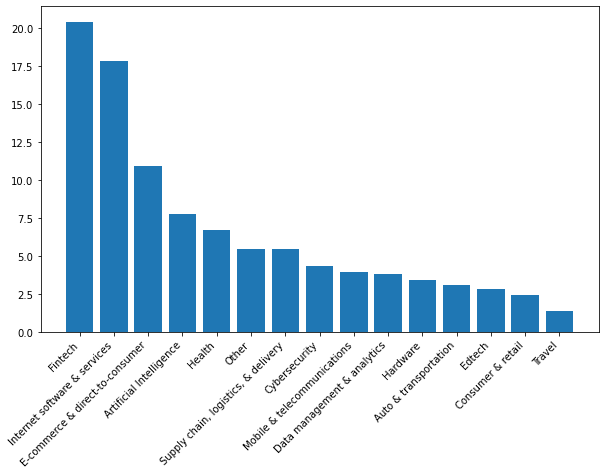

In [316]:
plt.figure(figsize=(10,6))
plt.bar(analise_industry.index,analise_industry);
plt.xticks(rotation = 45,ha='right');

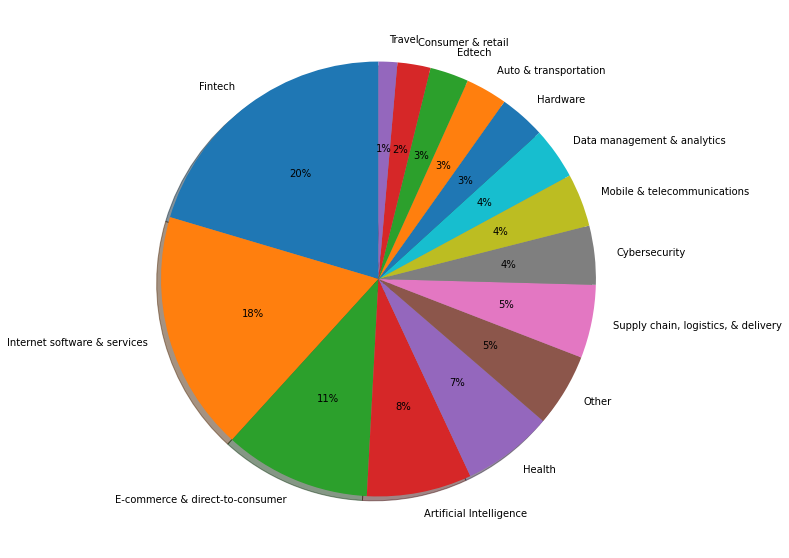

In [317]:
fig1_industry = plt.figure(figsize=(10,10))
plt.pie(analise_industry,labels=analise_industry.index,startangle = 90,autopct = "%.0f%%",shadow=True);


#### Análise da coluna Country

In [318]:
data["Country"].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

In [319]:
#Paises com nome errado: 'United States,' e 'Indonesia,' em vez de 'United States' e 'Indonesia'
data.loc[data["Country"] == "United States,","Country"] = "United States"
data.loc[data["Country"] == "Indonesia,","Country"] = "Indonesia"

In [320]:
data["Country"].value_counts().head()

United States     478
China             169
India              51
United Kingdom     37
Germany            23
Name: Country, dtype: int64

In [321]:
analise_country = round(data['Country'].value_counts(normalize=True)*100,2)

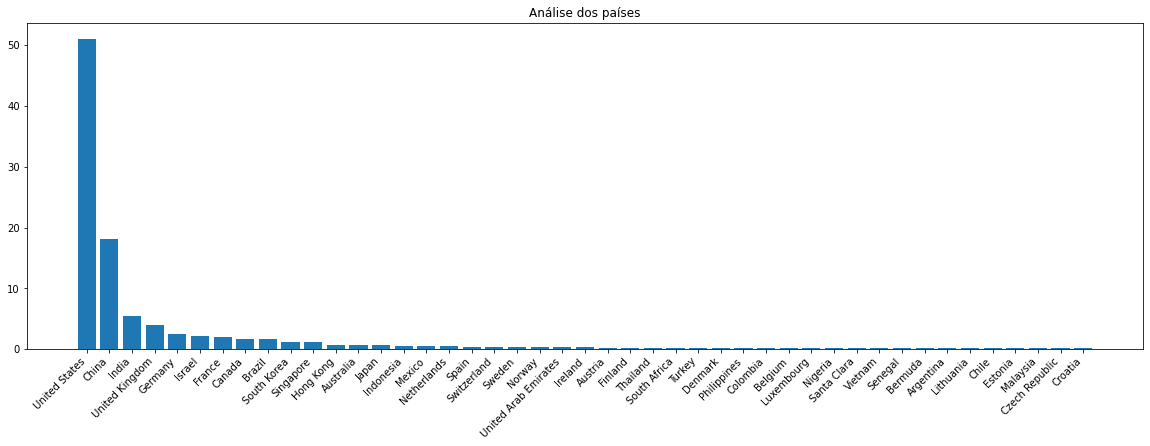

In [322]:
plt.figure(figsize = (20,6))
plt.title('Análise dos países')
plt.bar(analise_country.index,analise_country);
plt.xticks(rotation=45,ha='right');

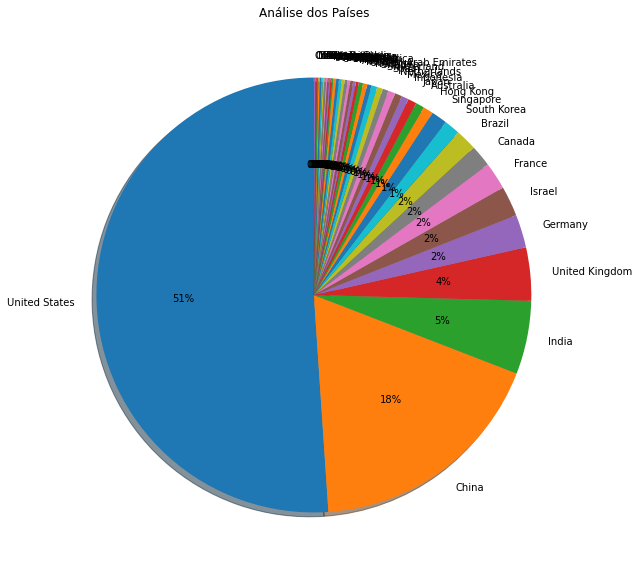

In [323]:
#plot com todos os países geradores de Unicornios
plt.figure(figsize = (10,10))
plt.title("Análise dos Países")
plt.pie(analise_country,labels=analise_country.index,startangle = 90,autopct = "%.0f%%",shadow=True);


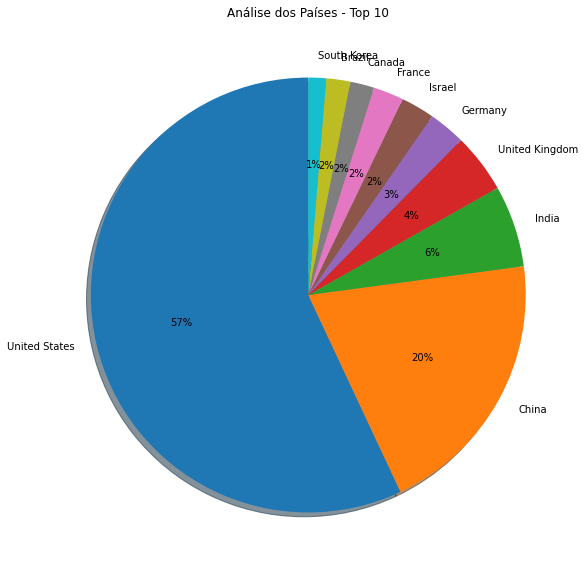

In [324]:
#top 10 dos paises
fig1_country = plt.figure(figsize = (10,10))
plt.title("Análise dos Países - Top 10")
plt.pie(analise_country[:10],labels=analise_country.index[:10],startangle = 90,autopct = "%.0f%%",shadow=True);


### Consertando a data (object to datetime)

In [325]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])

In [326]:
data["Month"] = pd.DatetimeIndex(data['Date Joined']).month
data["Year"] = pd.DatetimeIndex(data['Date Joined']).year

In [327]:
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


### Consertando o Valuation

In [328]:
#data["Valuation ($B)"] = [float(value[1:]) for value in data["Valuation ($B)"]]
data["Valuation ($B)"] = data["Valuation ($B)"].apply(lambda linha: float(linha.replace('$','')))

In [329]:
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [330]:
tab_agrupada = data[["Country","Year","Month","Company","Valuation ($B)"]].groupby(["Country","Year","Month","Company","Valuation ($B)"]).count().reset_index()
tab_agrupada

,Country,Year,Month,Company,Valuation ($B)
0,Argentina,2021,8,Uala,2.45
1,Australia,2018,1,Canva,40.00
2,Australia,2019,3,Airwallex,5.50
3,Australia,2021,5,SafetyCulture,1.60
4,Australia,2021,7,Culture Amp,1.50
...,...,...,...,...,...
931,United States,2021,12,Jokr,1.20
932,United States,2021,12,Panther Labs,1.40
933,United States,2021,12,ReliaQuest,1.00
934,United States,2021,12,YipitData,1.00


In [331]:
tab_agrupada.loc[tab_agrupada["Country"] == 'Brazil']

,Country,Year,Month,Company,Valuation ($B)
12,Brazil,2018,3,Nubank,30.00
13,Brazil,2018,7,Movile,1.00
14,Brazil,2018,11,iFood,1.00
15,Brazil,2019,6,Loggi,2.00
16,Brazil,2019,9,QuintoAndar,5.10
17,Brazil,2019,10,EBANX,1.00
18,Brazil,2019,12,Wildlife Studios,3.00
19,Brazil,2020,1,Loft,2.90
20,Brazil,2020,12,C6 Bank,5.05
21,Brazil,2020,12,Creditas,1.75


In [332]:
data.loc[data["Company"] == '1'] #Isso pode ser uma falha de quem forneceu a base de dados. Qual seria o nome dessa empresa? O fornecedor deve ser consultado

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
338,1,2.15,2021-09-08,Brazil,Sao Paulo,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",9,2021


In [333]:
## Analisando dominância em relação ao Valuation (qual country? qual Industry?)

In [334]:

analise_valuation = data[['Country','Industry','Valuation ($B)']].groupby(['Country','Industry']).sum().sort_values('Valuation ($B)',ascending=False).reset_index()
analise_valuation["Valuation (%)"] = round(analise_valuation["Valuation ($B)"]*100/data['Valuation ($B)'].sum(),2)

In [335]:
analise_valuation

,Country,Industry,Valuation ($B),Valuation (%)
0,United States,Fintech,384.84,12.53
1,United States,Internet software & services,348.27,11.34
2,United States,Other,187.30,6.10
3,China,Artificial Intelligence,183.67,5.98
4,United States,Health,129.21,4.21
...,...,...,...,...
173,Switzerland,Health,1.00,0.03
174,Thailand,"Supply chain, logistics, & delivery",1.00,0.03
175,Turkey,Mobile & telecommunications,1.00,0.03
176,Hong Kong,E-commerce & direct-to-consumer,1.00,0.03


In [336]:
analise_valuation_country = analise_valuation[['Country','Valuation (%)']].groupby('Country').sum().sort_values('Valuation (%)',ascending=False).reset_index()
analise_valuation_country.head()

,Country,Valuation (%)
0,United States,52.26
1,China,18.53
2,United Kingdom,4.89
3,India,4.83
4,Germany,2.15


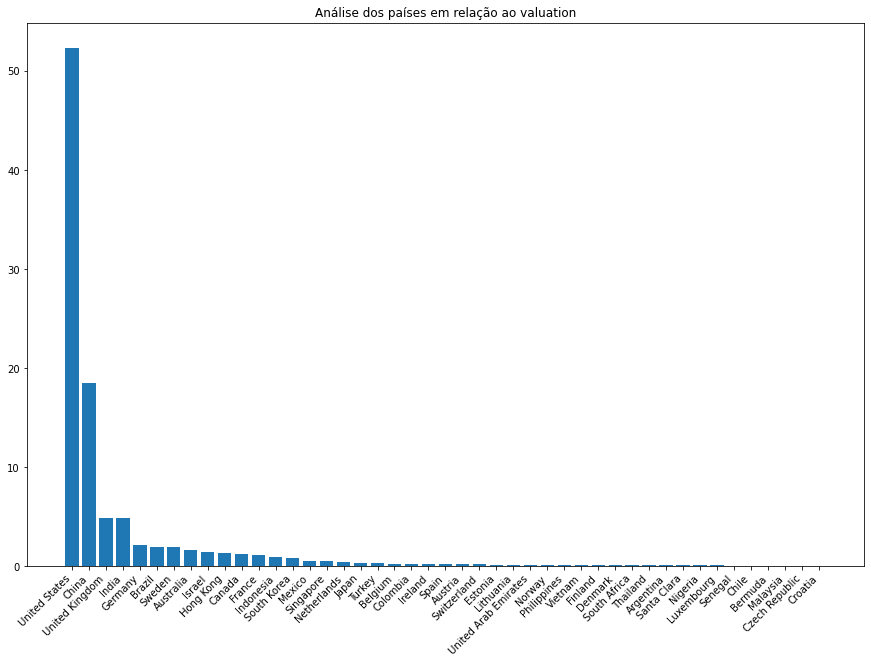

In [337]:
plt.figure(figsize= (15,10))

plt.title('Análise dos países em relação ao valuation')
plt.bar(analise_valuation_country['Country'],analise_valuation_country['Valuation (%)']);
plt.xticks(rotation=45,ha='right');

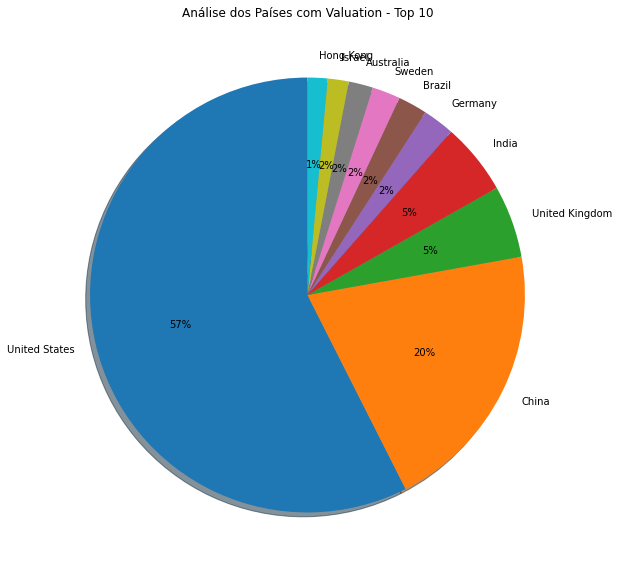

In [338]:
fig2_country = plt.figure(figsize = (10,10))
plt.title("Análise dos Países com Valuation - Top 10")
plt.pie(analise_valuation_country['Valuation (%)'][:10],labels = analise_valuation_country['Country'][:10],startangle = 90,autopct = "%.0f%%",shadow=True);

In [339]:
analise_valuation_industry = analise_valuation[['Industry','Valuation (%)']].groupby('Industry').sum().sort_values('Valuation (%)',ascending=False).reset_index()
analise_valuation_industry

,Industry,Valuation (%)
0,Fintech,24.23
1,Internet software & services,15.77
2,Artificial Intelligence,10.20
3,E-commerce & direct-to-consumer,9.45
4,Other,7.99
5,Health,5.41
6,"Supply chain, logistics, & delivery",4.75
7,Data management & analytics,3.97
8,Cybersecurity,3.49
9,Hardware,3.20


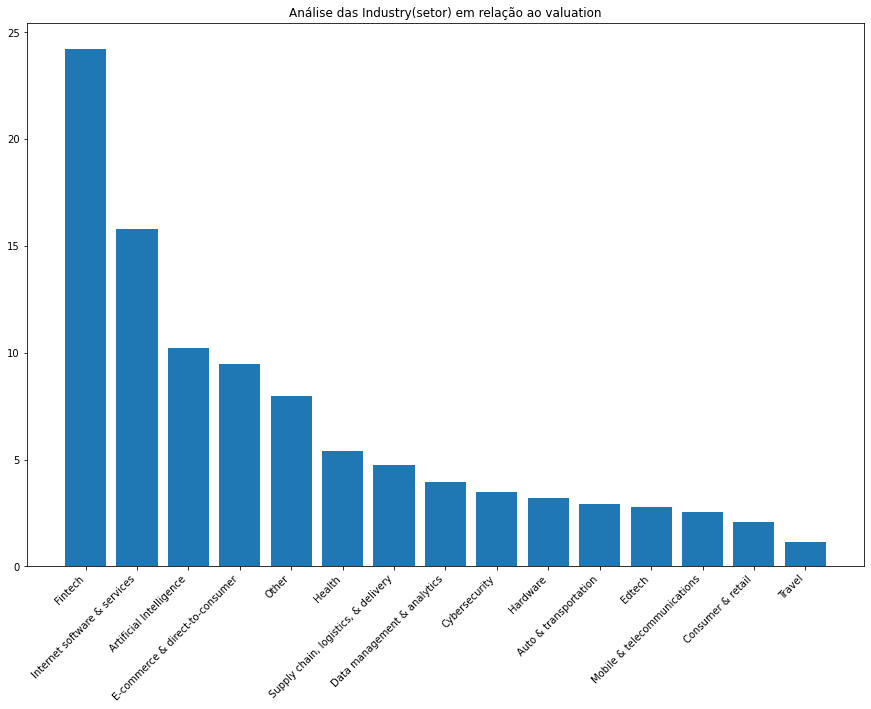

In [340]:
plt.figure(figsize= (15,10))

plt.title('Análise das Industry(setor) em relação ao valuation')
plt.bar(analise_valuation_industry['Industry'],analise_valuation_industry['Valuation (%)']);
plt.xticks(rotation=45,ha='right');

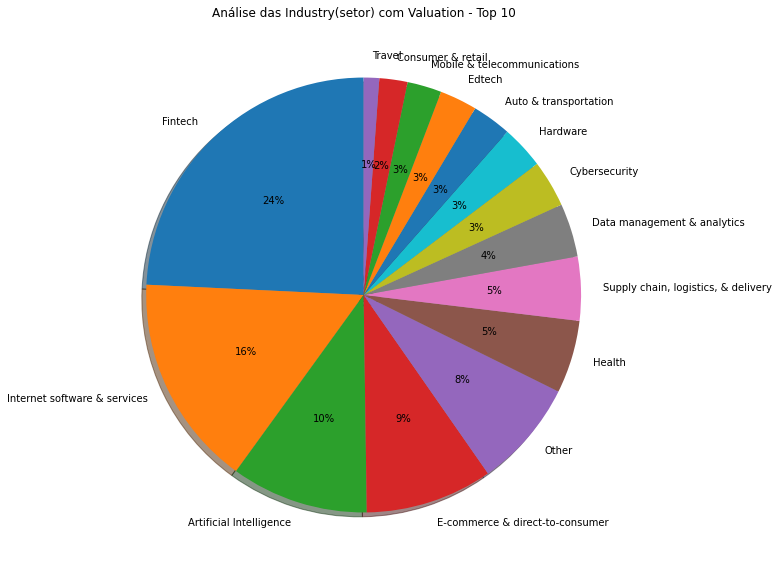

In [341]:
fig2_industry = plt.figure(figsize = (10,10))
plt.title("Análise das Industry(setor) com Valuation - Top 10")
plt.pie(analise_valuation_industry['Valuation (%)'],labels = analise_valuation_industry['Industry'],startangle = 90,autopct = "%.0f%%",shadow=True);

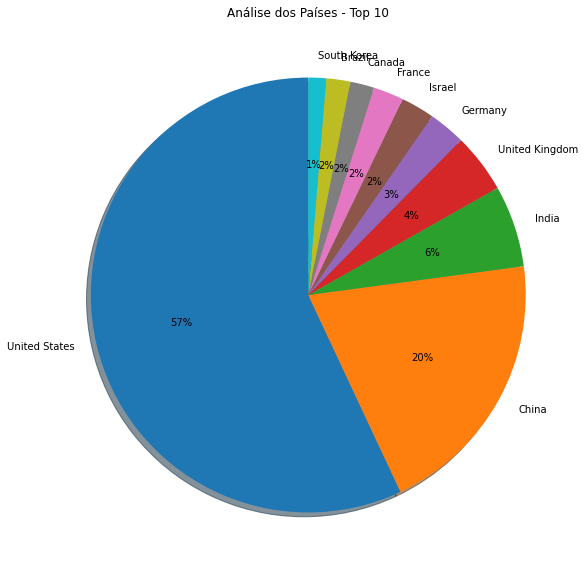

In [342]:
fig1_country

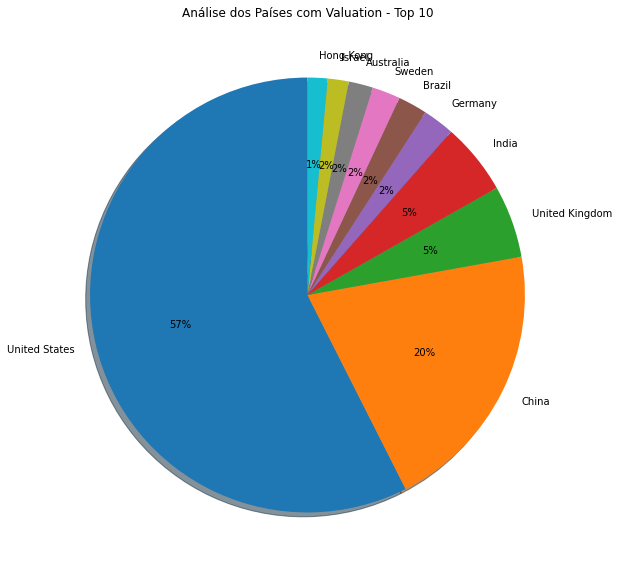

In [343]:
fig2_country

# O Brasil está em 9º lugar no ranking em formação de Unicónios. No entanto, está em 5º lugar no ranking de geração de valor (valuation)!!